In [1]:
#importing all important libraries

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices

from sklearn import datasets, svm
#for heat map
import seaborn as sns

In [2]:
data_file = pd.read_csv("train.csv")
#data_file

In [3]:
#cleaning the data set, most of the entries in ticket and cabin has NaN
data_file = data_file.drop(['Ticket','Cabin'], axis=1)
#Removing entries which have atleast on NaN in one of the feature
data_file = data_file.dropna()
data_file[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


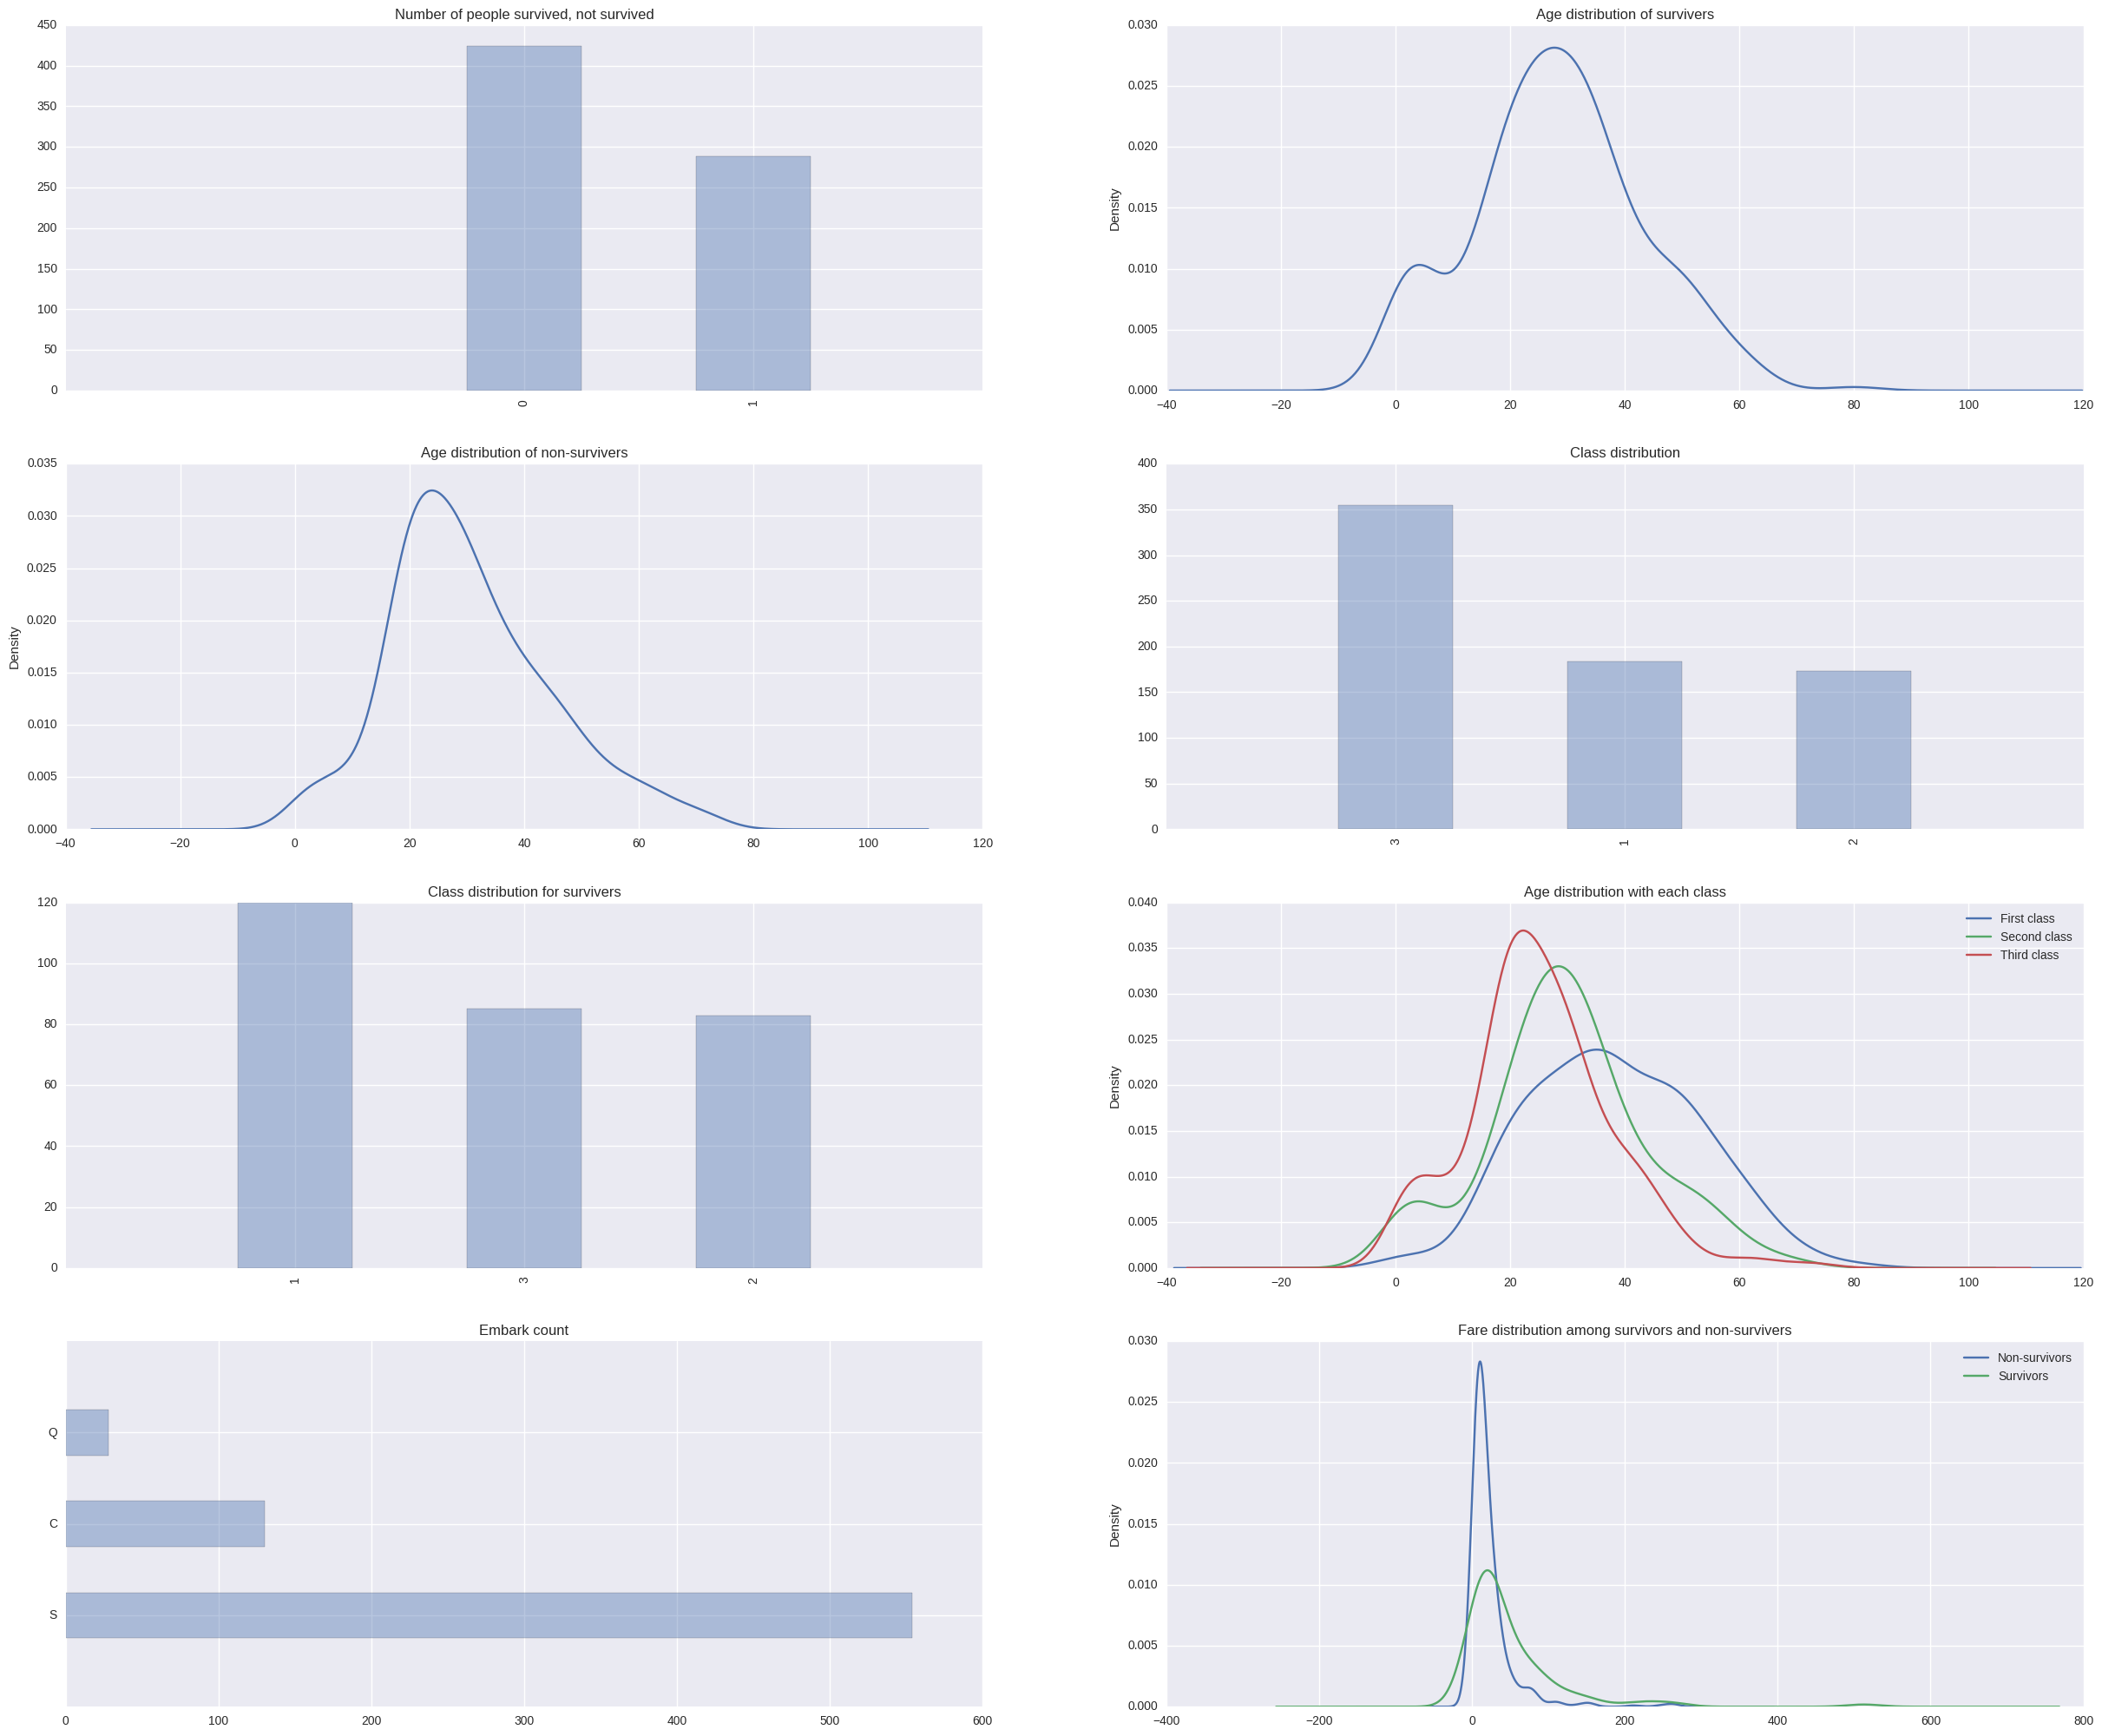

In [4]:
#Plotting basics, pandas beutifully integrates with matplotlib
"""Plots will have
1. Number of people survived, not survived
2. Histogram of people survived with respect to age
3. Histogram of people who did not survived with respect to age
4. Class distribution
5. Class distribution for people who survived
6. Age distribution with each class
7. Embark count
8. Fare distribution with each class"""

#All in one figure
fig = plt.figure(figsize=(30,25),dpi=2000)

subplot1 = plt.subplot2grid((4,2),(0,0))
data_file.Survived.value_counts().plot(kind='bar', alpha = 0.4)
subplot1.set_xlim(-2,2)
plt.title("Number of people survived, not survived")

subplot2 = plt.subplot2grid((4,2),(0,1))
data_file.Age[data_file.Survived==1].plot(kind='kde')
plt.title("Age distribution of survivers")

subplot3 = plt.subplot2grid((4,2),(1,0))
data_file.Age[data_file.Survived==0].plot(kind='kde')
plt.title("Age distribution of non-survivers")

subplot4 = plt.subplot2grid((4,2),(1,1))
data_file.Pclass.value_counts().plot(kind="bar", alpha = 0.4)
subplot4.set_xlim(-1, len(data_file.Pclass.value_counts()))
plt.title("Class distribution")

subplot5 = plt.subplot2grid((4,2),(2,0))
data_file.Pclass[data_file.Survived==1].value_counts().plot(kind="bar", alpha = 0.4)
subplot5.set_xlim(-1, len(data_file.Pclass[data_file.Survived==1].value_counts()))
plt.title("Class distribution for survivers")

subplot6 = plt.subplot2grid((4,2),(2,1))
data_file.Age[data_file.Pclass == 1].plot(kind='kde')
data_file.Age[data_file.Pclass == 2].plot(kind='kde')
data_file.Age[data_file.Pclass == 3].plot(kind='kde')
plt.title("Age distribution with each class")
plt.legend(('First class','Second class','Third class'),loc='best')

subplot7 = plt.subplot2grid((4,2),(3,0))
data_file.Embarked.value_counts().plot(kind='barh',alpha=0.4)
subplot7.set_ylim(-1, len(data_file.Embarked.value_counts()))
plt.title("Embark count")

subplot8 = plt.subplot2grid((4,2),(3,1))
data_file.Fare[data_file.Survived == 0].plot(kind='kde')
data_file.Fare[data_file.Survived == 1].plot(kind='kde')
plt.title("Fare distribution among survivors and non-survivers")
plt.legend(('Non-survivors','Survivors'),loc='best')


/home/vishal/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4df67fda10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4deaf7a310>]], dtype=object)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


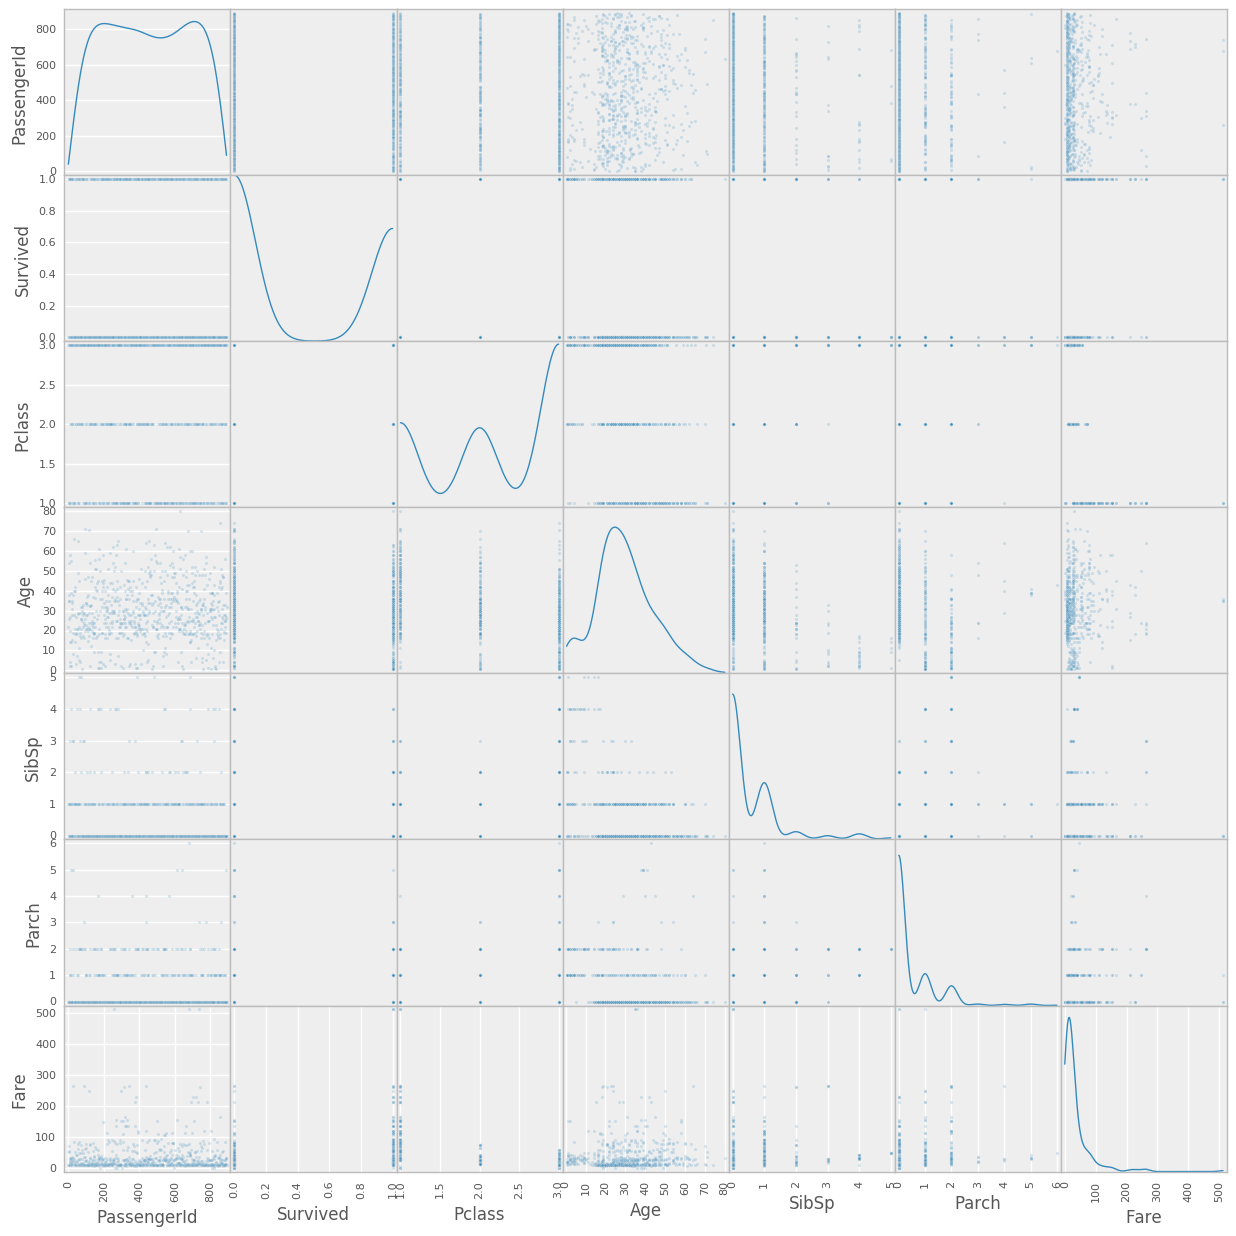

In [5]:
#fig = plt.figure(figsize=(30,25),dpi=2000)
pd.options.display.mpl_style = 'default'

scatter_matrix(data_file, alpha=0.2, figsize=(15, 15), diagonal='kde')
#Shows correlaton beetween data, since most of them are integral, does not much idea.

In [6]:
#We can have this correlation in table also. For that we need some adjustment in data_file
new_data_file = data_file.drop(['PassengerId','Name','Embarked'], axis=1)
def to_numeric_str(var):
    if var=='male':
        return '0'
    else:
        return '1'
#Usage of lambda function
new_data_file[['Sex']] = new_data_file[['Sex']].apply(lambda row: to_numeric_str(row['Sex']),axis=1)
new_data_file[['Sex']] = new_data_file[['Sex']].apply(pd.to_numeric)
new_data_file[0:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


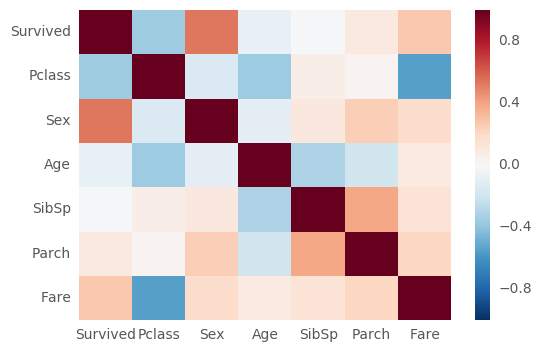

In [7]:
corr = new_data_file.corr()
corr
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

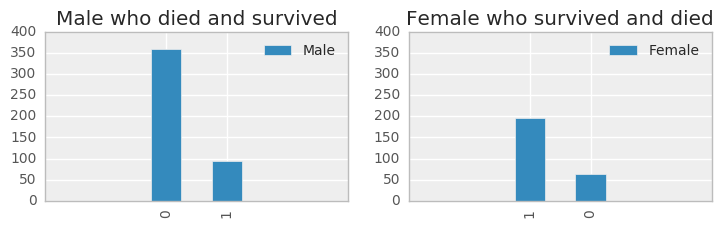

In [8]:
#Graphical Analysis for Sex and survivors
fig = plt.figure(figsize=(18,12), dpi=1600)

subplot9 = fig.add_subplot(4,4,1)
data_file.Survived[data_file.Sex == 'male'].value_counts().plot(kind='bar', label='Male')
subplot9.set_xlim(-2,3)
subplot9.set_ylim(0,400)
plt.title("Male who died and survived")
plt.legend(loc='best')

subplot10 = fig.add_subplot(4,4,2)
data_file.Survived[data_file.Sex == 'female'].value_counts().plot(kind='bar', label='Female')
subplot10.set_xlim(-2,3)
subplot10.set_ylim(0,400)
plt.title("Female who survived and died")
plt.legend(loc='best')
#In the below graph we see, more men died and more women survived with respect to each other, what the partiality


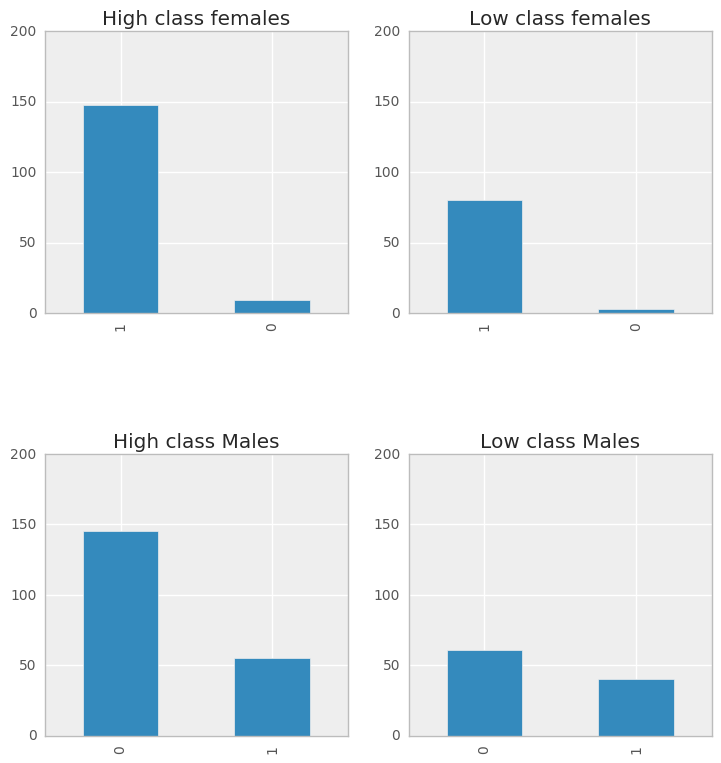

In [9]:
#Graphical Analysis for Sex, Class and survivors, for high class people
fig = plt.figure(figsize=(18,20), dpi=1600)

subplot11 = fig.add_subplot(4,4,1)
data_file.Survived[data_file.Sex=='female'][data_file.Pclass!=3].value_counts().plot(kind='bar')
subplot11.set_ylim(0,200)
plt.title("High class females")

subplot12 = fig.add_subplot(4,4,2)
data_file.Survived[data_file.Sex=='female'][data_file.Pclass==1].value_counts().plot(kind='bar')
subplot12.set_ylim(0,200)
plt.title("Low class females")

subplot13 = fig.add_subplot(4,4,5)
data_file.Survived[data_file.Sex=='male'][data_file.Pclass!=3].value_counts().plot(kind='bar')
subplot13.set_ylim(0,200)
plt.title("High class Males")

subplot14 = fig.add_subplot(4,4,6)
data_file.Survived[data_file.Sex=='male'][data_file.Pclass==1].value_counts().plot(kind='bar')
subplot14.set_ylim(0,200)
plt.title("Low class Males")

#High class people were saved first, then low class. In that also, females took the lead.

In [10]:
#Now with above analysis, we apply learning models for prediction